In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
# import and merge data (3 parts)
df1 = pd.read_csv('TweetsCOV19_part1.tsv', sep='\t', header=None, on_bad_lines='skip')
df2 = pd.read_csv('TweetsCOV19_part2.tsv', sep='\t', header=None, on_bad_lines='skip')
df3 = pd.read_csv('TweetsCOV19_part3.tsv', sep='\t', header=None, on_bad_lines='skip')

data = [df1, df2, df3]
df = pd.concat(data)

# data cleaning
df.columns = ['TweetID', 'Username', 'Timestamp', 'N_Followers', 'N_Friends', 'N_Retweets', 'N_Favorites',
             'Entities', 'Sentiment', 'Mentions', 'Hashtags', 'URLs']
df = df[df.Entities != 'null;']
df['Original_Entities'] = [[entity.split(':')[0] for entity in entity_group.split(';')[:-1]] 
                           for entity_group in df['Entities']]
df['Annotated_Entities'] = [[entity.split(':')[1] for entity in entity_group.split(';')[:-1]] 
                            for entity_group in df['Entities']]
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.strftime("%Y-%m-%d")
df['Positive_Sentiment'] = [int(x[0]) for x in df['Sentiment']]
df['Negative_Sentiment'] = [int(x[-2:]) for x in df['Sentiment']]
df['Overall_Sentiment'] = df['Positive_Sentiment'] + df['Negative_Sentiment']
df = df.drop(['Entities', 'URLs', 'Sentiment'], axis=1)

In [3]:
# define a function to generate word cloud
def generate_wordcloud(data, title, color, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=100,
                      colormap=color,
                      mask=mask,
                      background_color='black',
                      collocations=True,
                      contour_color='#5d0f24',
                      contour_width=3).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.savefig("{}.png".format(title))
#     plt.show()

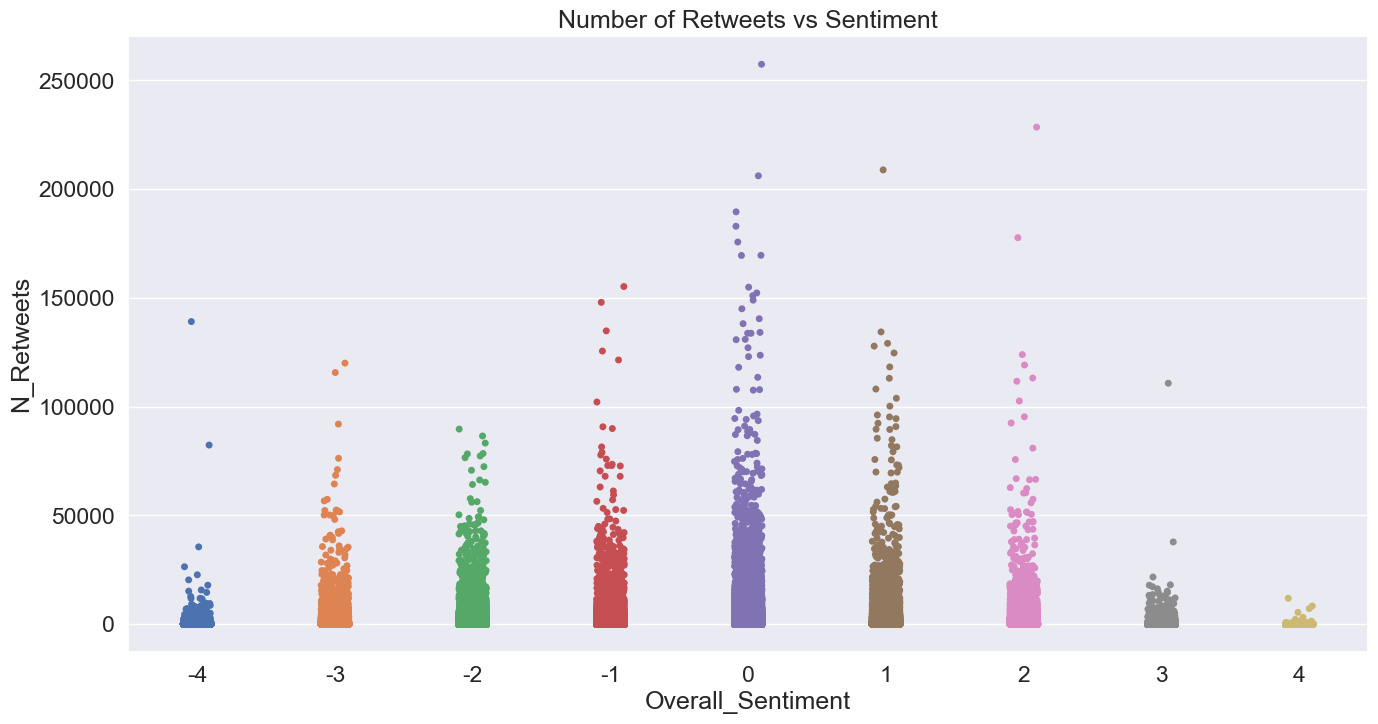

In [8]:
# create a plot that presents relations between sentiment score and number of retweets
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 8))
sns.stripplot(data=df, x="Overall_Sentiment", y="N_Retweets",ax=ax)
ax.set(title='Number of Retweets vs Sentiment')
plt.savefig("Number of Retweets vs Sentiment.png")
plt.show()

In [9]:
# extract tweets with extreme sentiment scores
pos_df = df[df['Positive_Sentiment'] == 4]
neg_df = df[df['Negative_Sentiment'] == -4]

# create text strings for word cloud
pos_entity_list = pos_df['Original_Entities'].tolist()
neg_entity_list = neg_df['Original_Entities'].tolist()
pos_entity_list = list(itertools.chain.from_iterable(pos_entity_list))
neg_entity_list = list(itertools.chain.from_iterable(neg_entity_list))
pos_text = ' '.join(pos_entity_list)
neg_text = ' '.join(neg_entity_list)

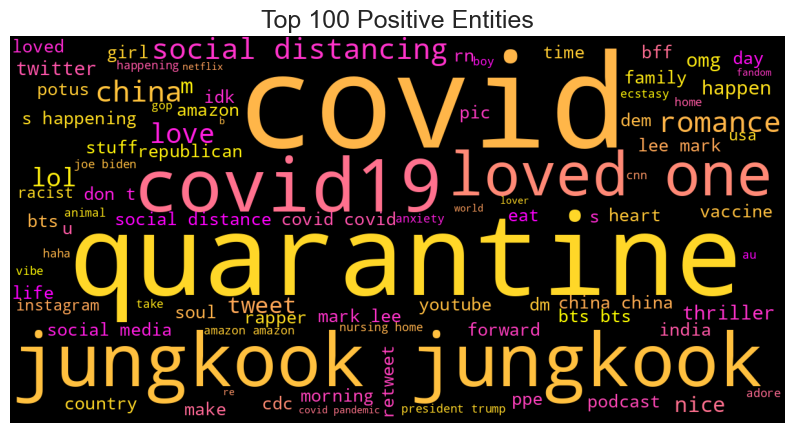

In [10]:
# generate word cloud for positive tweets and save the plot
generate_wordcloud(pos_text, 'Top 100 Positive Entities', 'spring')

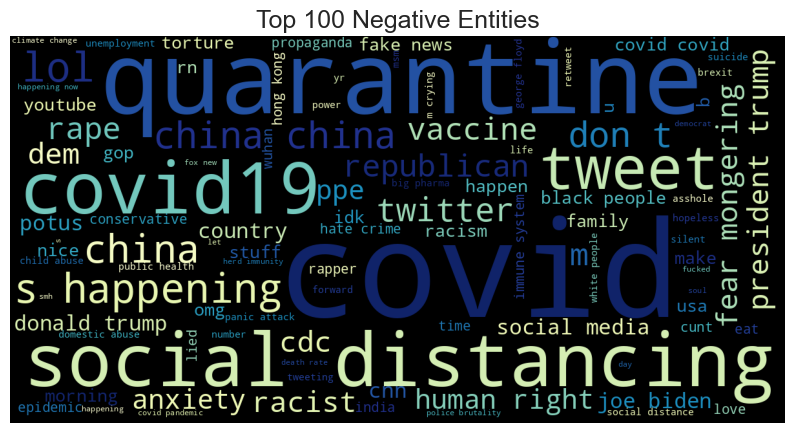

In [11]:
# generate word cloud for negative tweets and save the plot
generate_wordcloud(neg_text, 'Top 100 Negative Entities', 'YlGnBu')